----

<html>
<center>
    <font size=6><b> Konkurs DataWorkshop </b></font> <br> 
    w ramach 10 edycji kursu "DS & ML w praktyce" <br><br>
    <b> Przewidywanie emisji CO </b> <br>
     3. miejsce <br> <br>
    <b> Adrian Skutnik </b>
            </center>
</html>

----


## 🕵️‍♀️ Opis cech, które znajdziesz w danych 

- `AT` - Ambient temperature C 
- `AP` - Ambient pressure mbar 
- `AH` - Ambient humidity %
- `AFDP` - Air filter difference pressure mbar 
- `GTEP` - Gas turbine exhaust pressure mbar 
- `TIT` - Turbine inlet temperature C 
- `TAT` - Turbine after temperature C 
- `CDP` - Compressor discharge pressure mbar
- `TEY` - Turbine energy yield MWH 
- `NOx` - Nitrogen oxides mg/m3
- `CO` - Carbon monoxide mg/m3 (zmienna docelowa)

## 🗂️ Wczytujemy biblioteki i dane

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils as u

%load_ext autoreload
%autoreload 2

## Przygotowanie danych

In [2]:
df_all = u.prepare_data()

In [3]:
df_train, _ = u.split_data(df_all)
feats = u.get_feats(df_all)

## 👀 Sprawdźmy dane

In [4]:
df_train.sample(5)

id       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
2721  32245  20.6110  1017.5  80.243  3.3402  19.553  1056.6  550.04  109.72   
7986  14121  13.9920  1005.6  66.533  2.6042  21.338  1046.0  549.89  109.17   
4554  26751  25.9690  1016.7  78.634  3.9602  26.055  1094.2  549.83  134.71   
606   11945   3.6762  1010.2  50.595  3.9368  32.760  1099.8  532.97  164.70   
9519  26132  27.8550  1009.4  75.635  4.4960  30.485  1099.8  543.47  147.20   

         CDP     NOX       CO sample    log_CO  
2721  10.472  58.669  4.69450  train  1.739501  
7986  10.313  72.044  4.95730  train  1.784617  
4554  12.281  62.840  0.27103  train  0.239828  
606   14.053  66.105  2.84660  train  1.347190  
9519  13.284  53.372  1.70250  train  0.994177

In [5]:
df_train.describe()

id            AT            AP            AH          AFDP  \
count  18366.000000  18366.000000  18366.000000  18366.000000  18366.000000   
mean   18362.830012     17.632490   1013.116327     77.950121      3.924472   
std    10603.455265      7.437241      6.445225     14.435682      0.769289   
min        0.000000     -5.979300    986.160000     24.666000      2.087400   
25%     9194.750000     11.662250   1008.900000     68.383250      3.358425   
50%    18362.500000     17.684500   1012.600000     80.524500      3.938850   
75%    27471.750000     23.605000   1017.000000     89.372500      4.376900   
max    36732.000000     37.098000   1036.500000    100.190000      7.554900   

               GTEP           TIT           TAT           TEY           CDP  \
count  18366.000000  18366.000000  18366.000000  18366.000000  18366.000000   
mean      25.549357   1081.395268    546.160648    133.505393     12.058930   
std        4.187444     17.533809      6.841522     15.607735      1.088456   
min       17.698000   1001.300000    511.040000    100.020000      9.851800   
25%       23.103250   1071.900000    544.780000    124.527500     11.427250   
50%       25.099000   1085.800000    549.880000    133.740000     11.964000   
75%       28.922750   1096.775000    550.040000    143.700000     12.816500   
max       40.716000   1100.900000    550.610000    178.310000     15.081000   

                NOX            CO        log_CO  
count  18366.000000  18366.000000  18366.000000  
mean      65.413108      2.377507      1.083358  
std       11.646213      2.265829      0.480374  
min       27.183000      0.000388      0.000387  
25%       57.309750      1.180100      0.779371  
50%       63.965000      1.715350      0.998921  
75%       71.603750      2.848700      1.347735  
max      119.890000     43.428000      3.793870

## Rozkład targetu

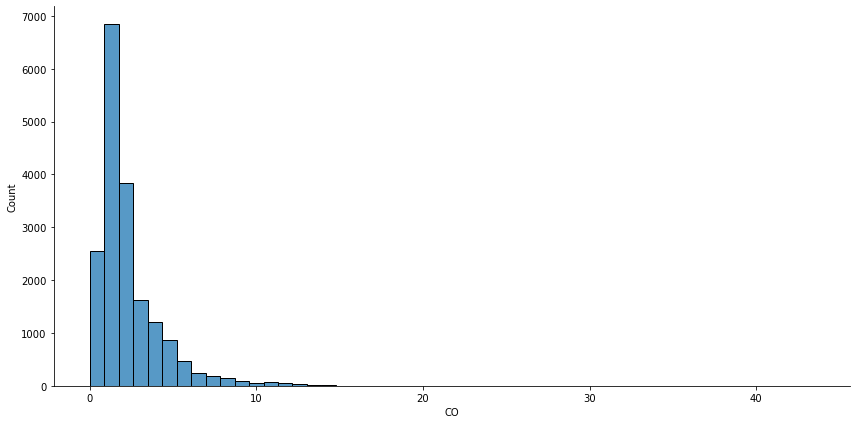

In [6]:
sns.displot(x=df_train['CO'], bins=50, height=6, aspect=2);

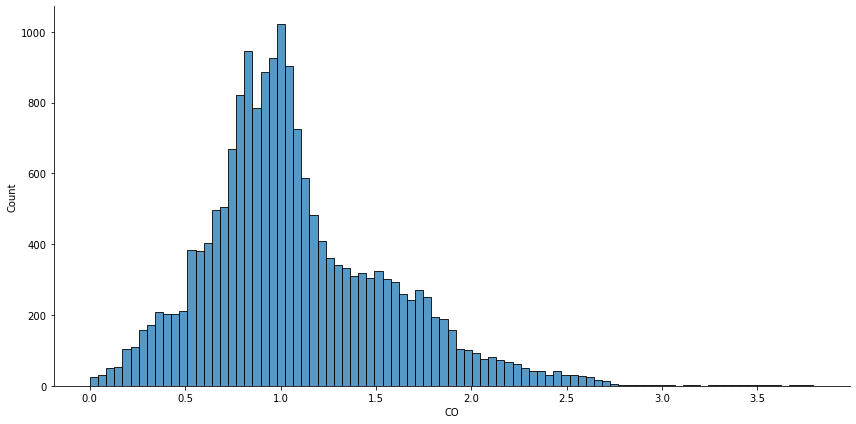

In [7]:
# df_train['log_CO']
sns.displot(x=np.log1p(df_train['CO']), height=6, aspect=2);

## Rozkład cech względem targetu

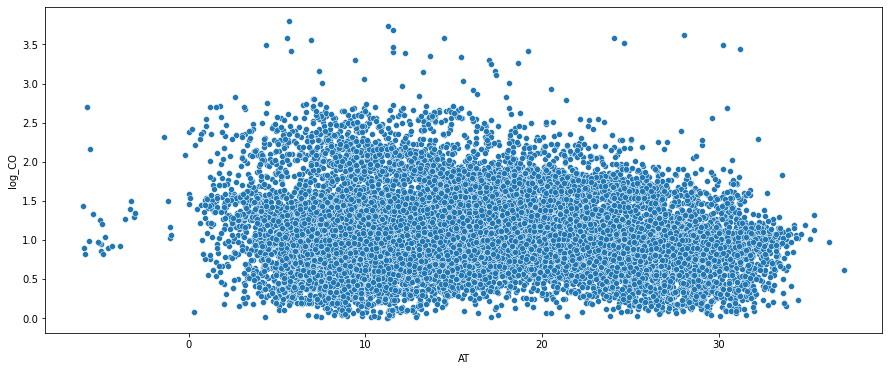

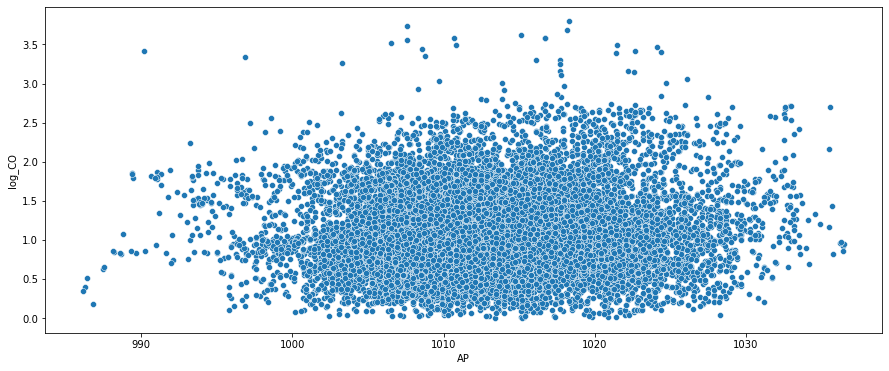

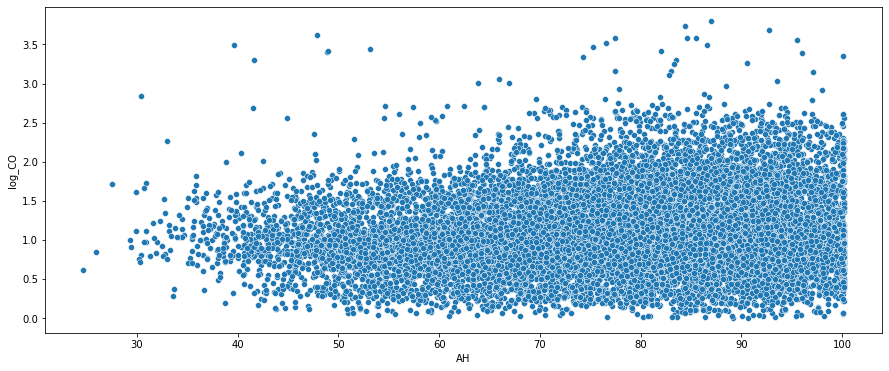

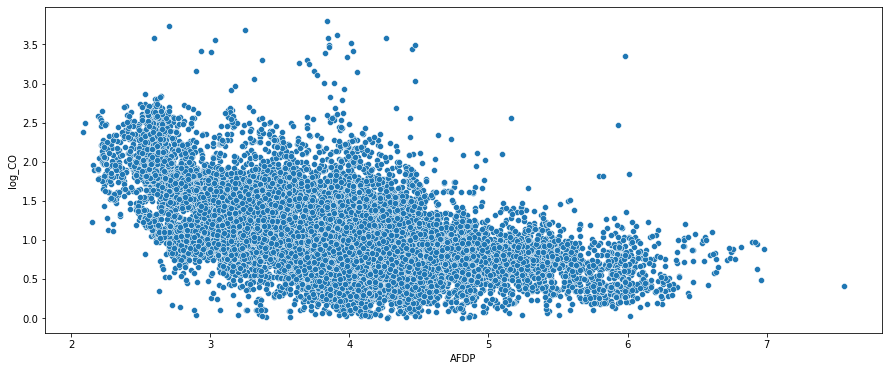

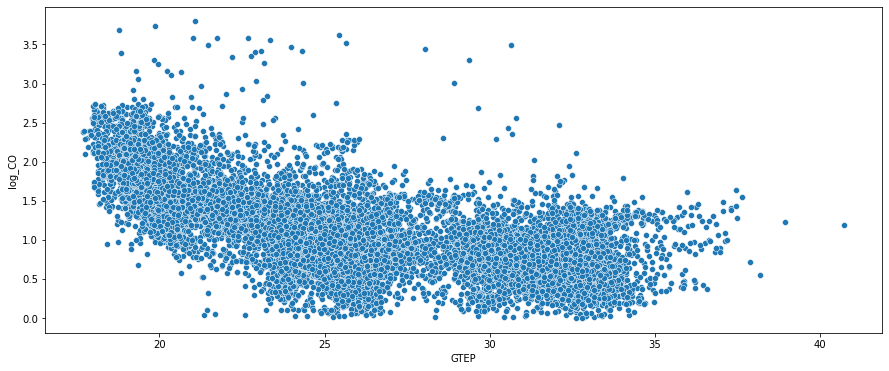

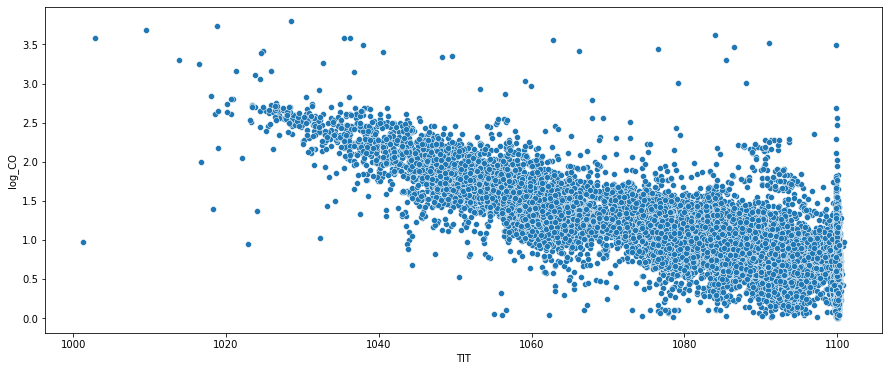

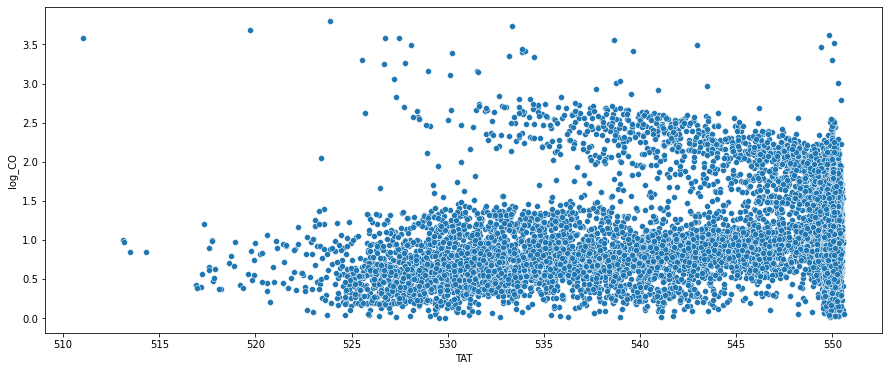

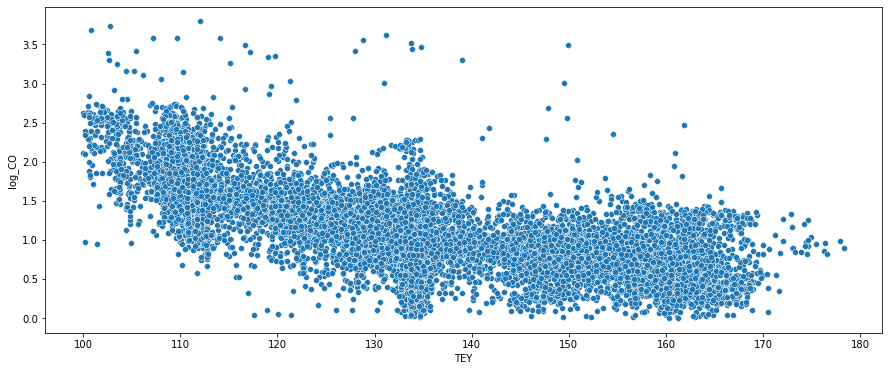

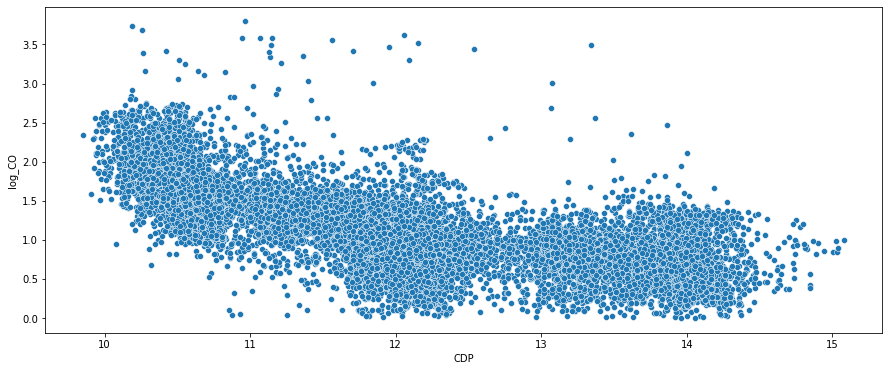

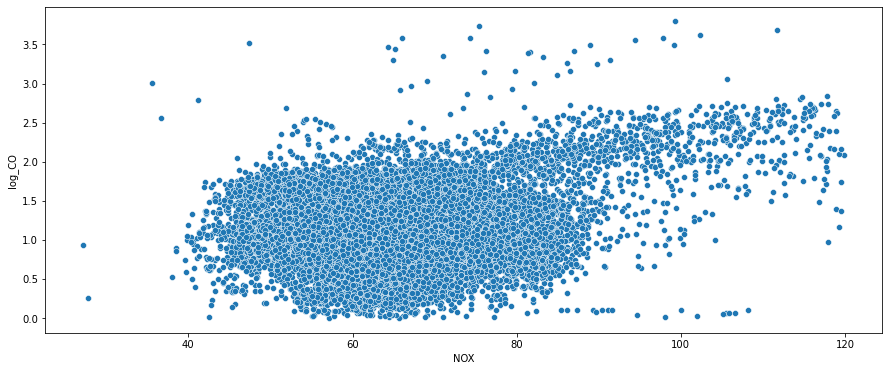

In [8]:
for col in df_train[feats]:
    plt.figure(figsize=(15, 6))
    #sns.scatterplot(x=df_train[col], y=df_train['CO']);
    sns.scatterplot(x=df_train[col], y=df_train['log_CO']);

## Porównanie rozkładów charakterystyk

**Pytania:**     
* Kiedy decydujemy, że rozkłady w poszczególnych cechach pomiędzy `train` i `test` są na tyle różne, że ryzykownym jest używanie danej cechy w modelu? 
* Czy warto to w ogóle mierzyć? `K-S`, czy jakaś inna miara?
* Najbardziej odstaje pierwsza cecha `AT`, czy taka różnica już ją dyskwalifikuje?

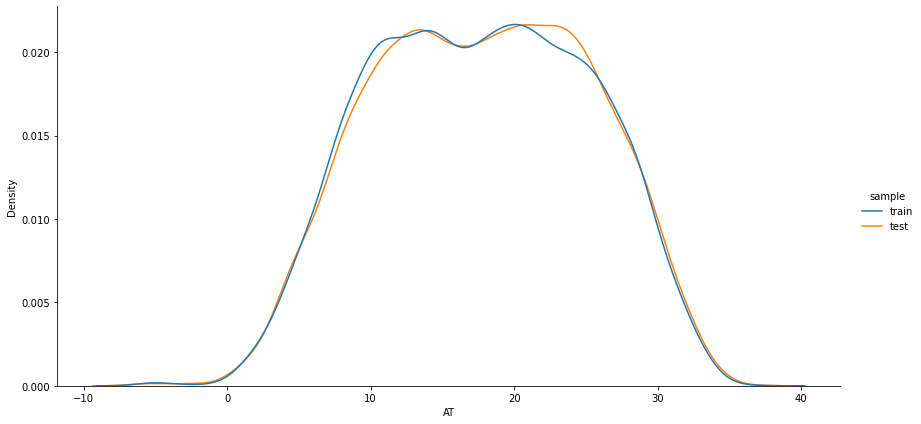

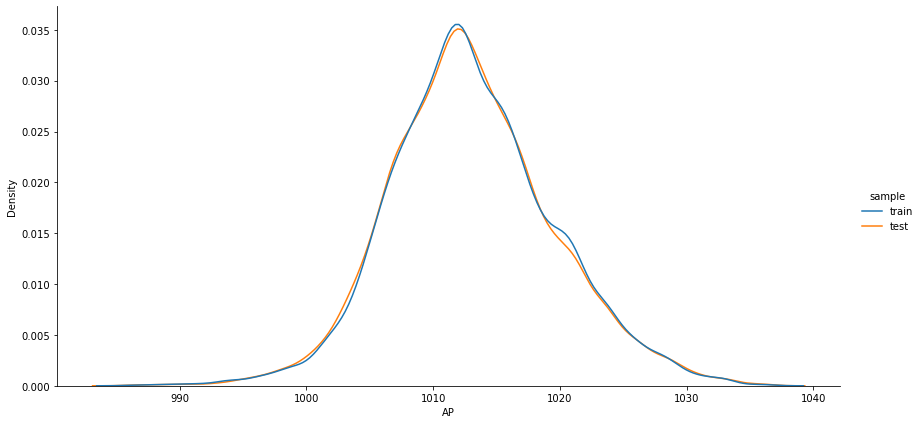

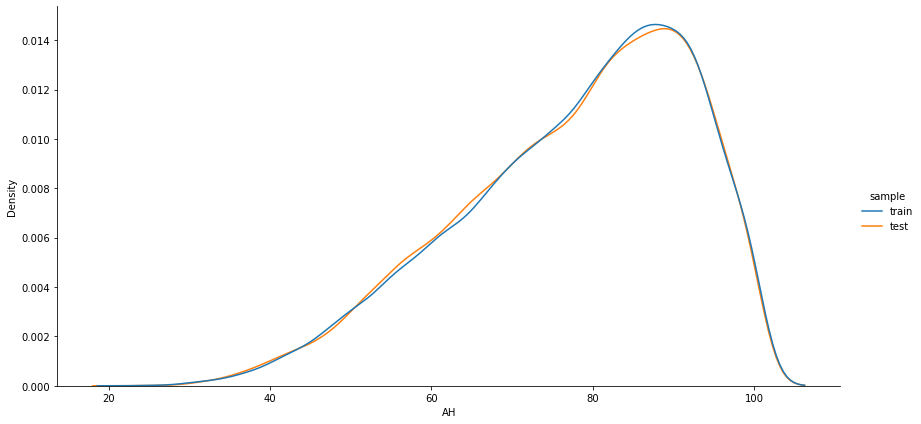

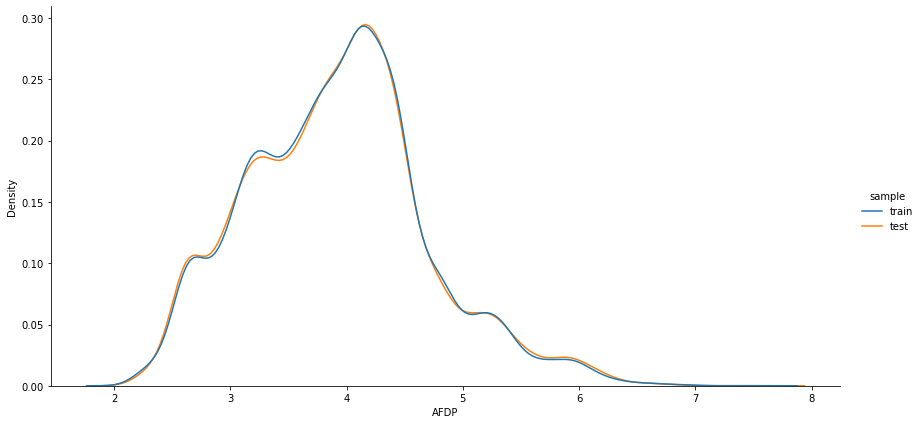

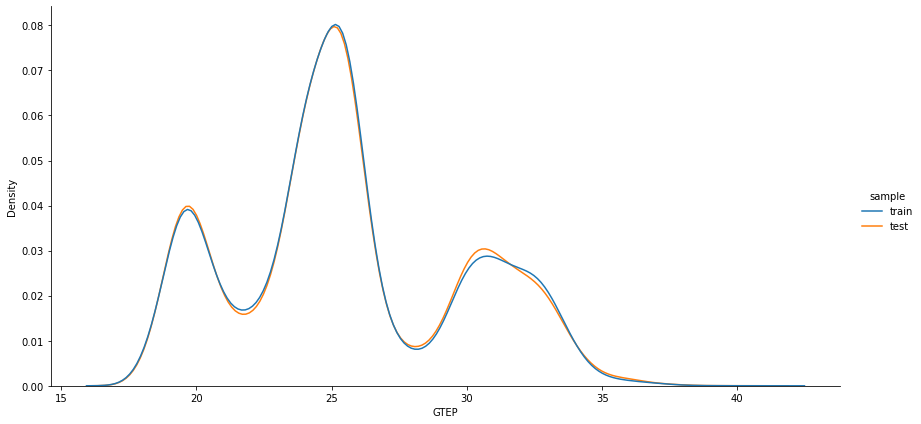

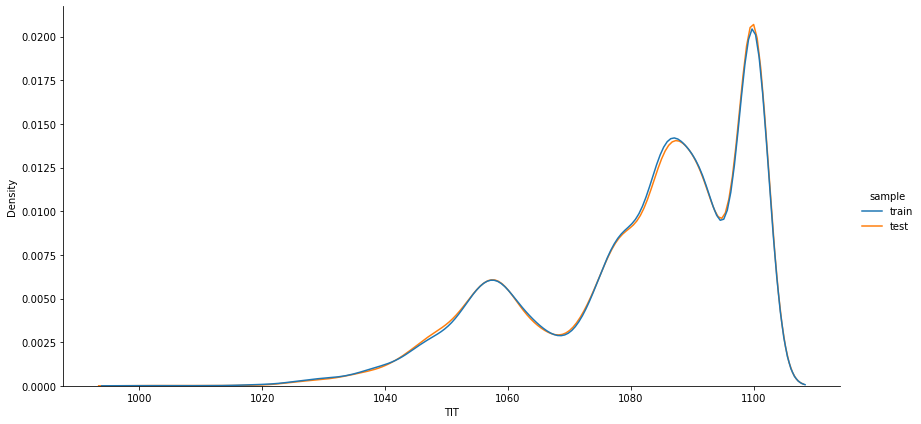

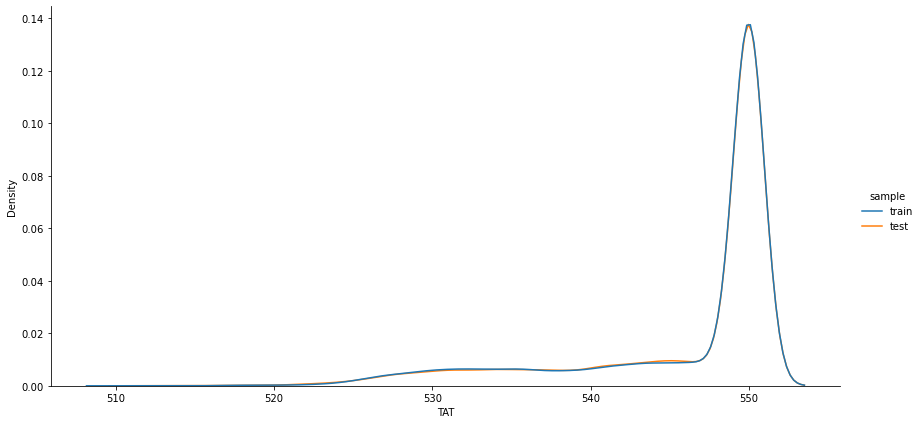

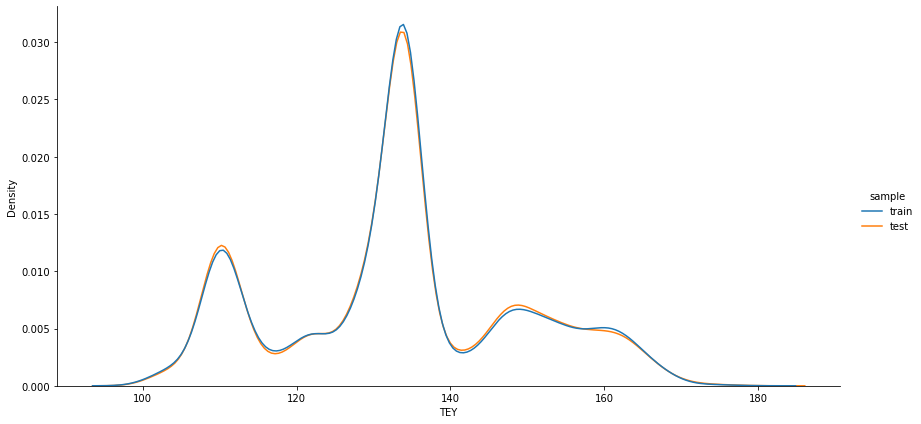

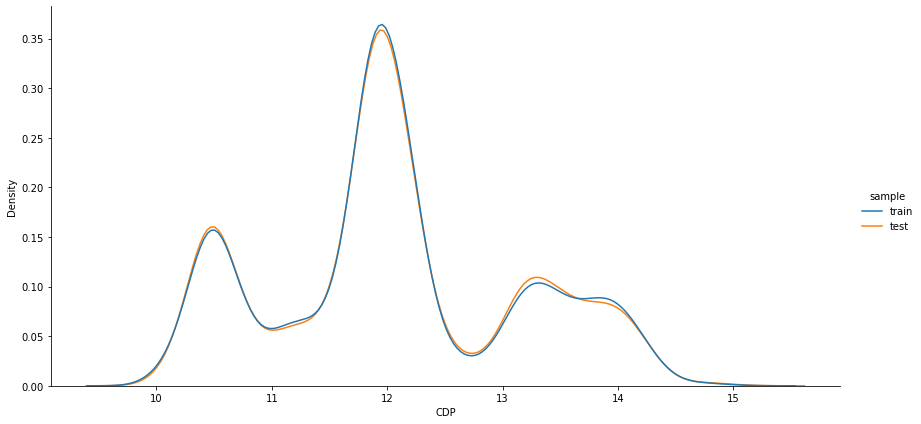

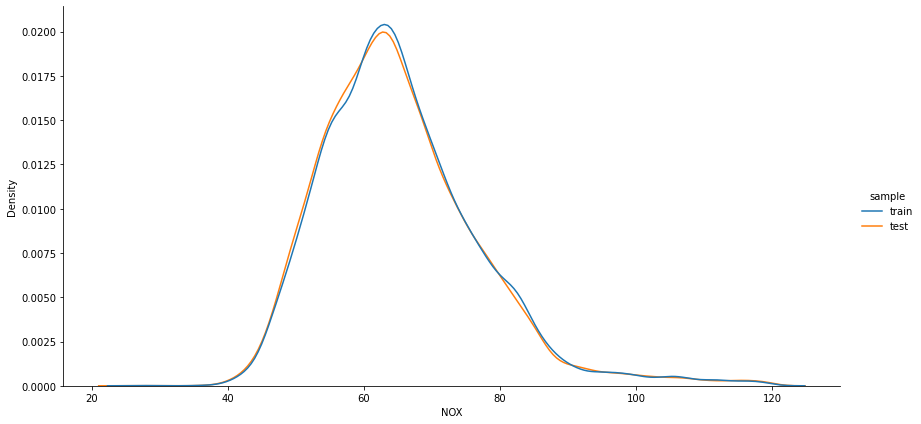

In [9]:
for col in df_all[feats].columns:
    sns.displot(data=df_all[feats + ['sample']], x=col, hue='sample', kind='kde', height=6, aspect=2);

## Rozkład targetu w cechach

In [10]:
df_all['CO_cat'] = (df_all['CO'] < df_all['CO'].median()).astype(int)
df_train, _ = u.split_data(df_all)
feats = u.get_feats(df_all)

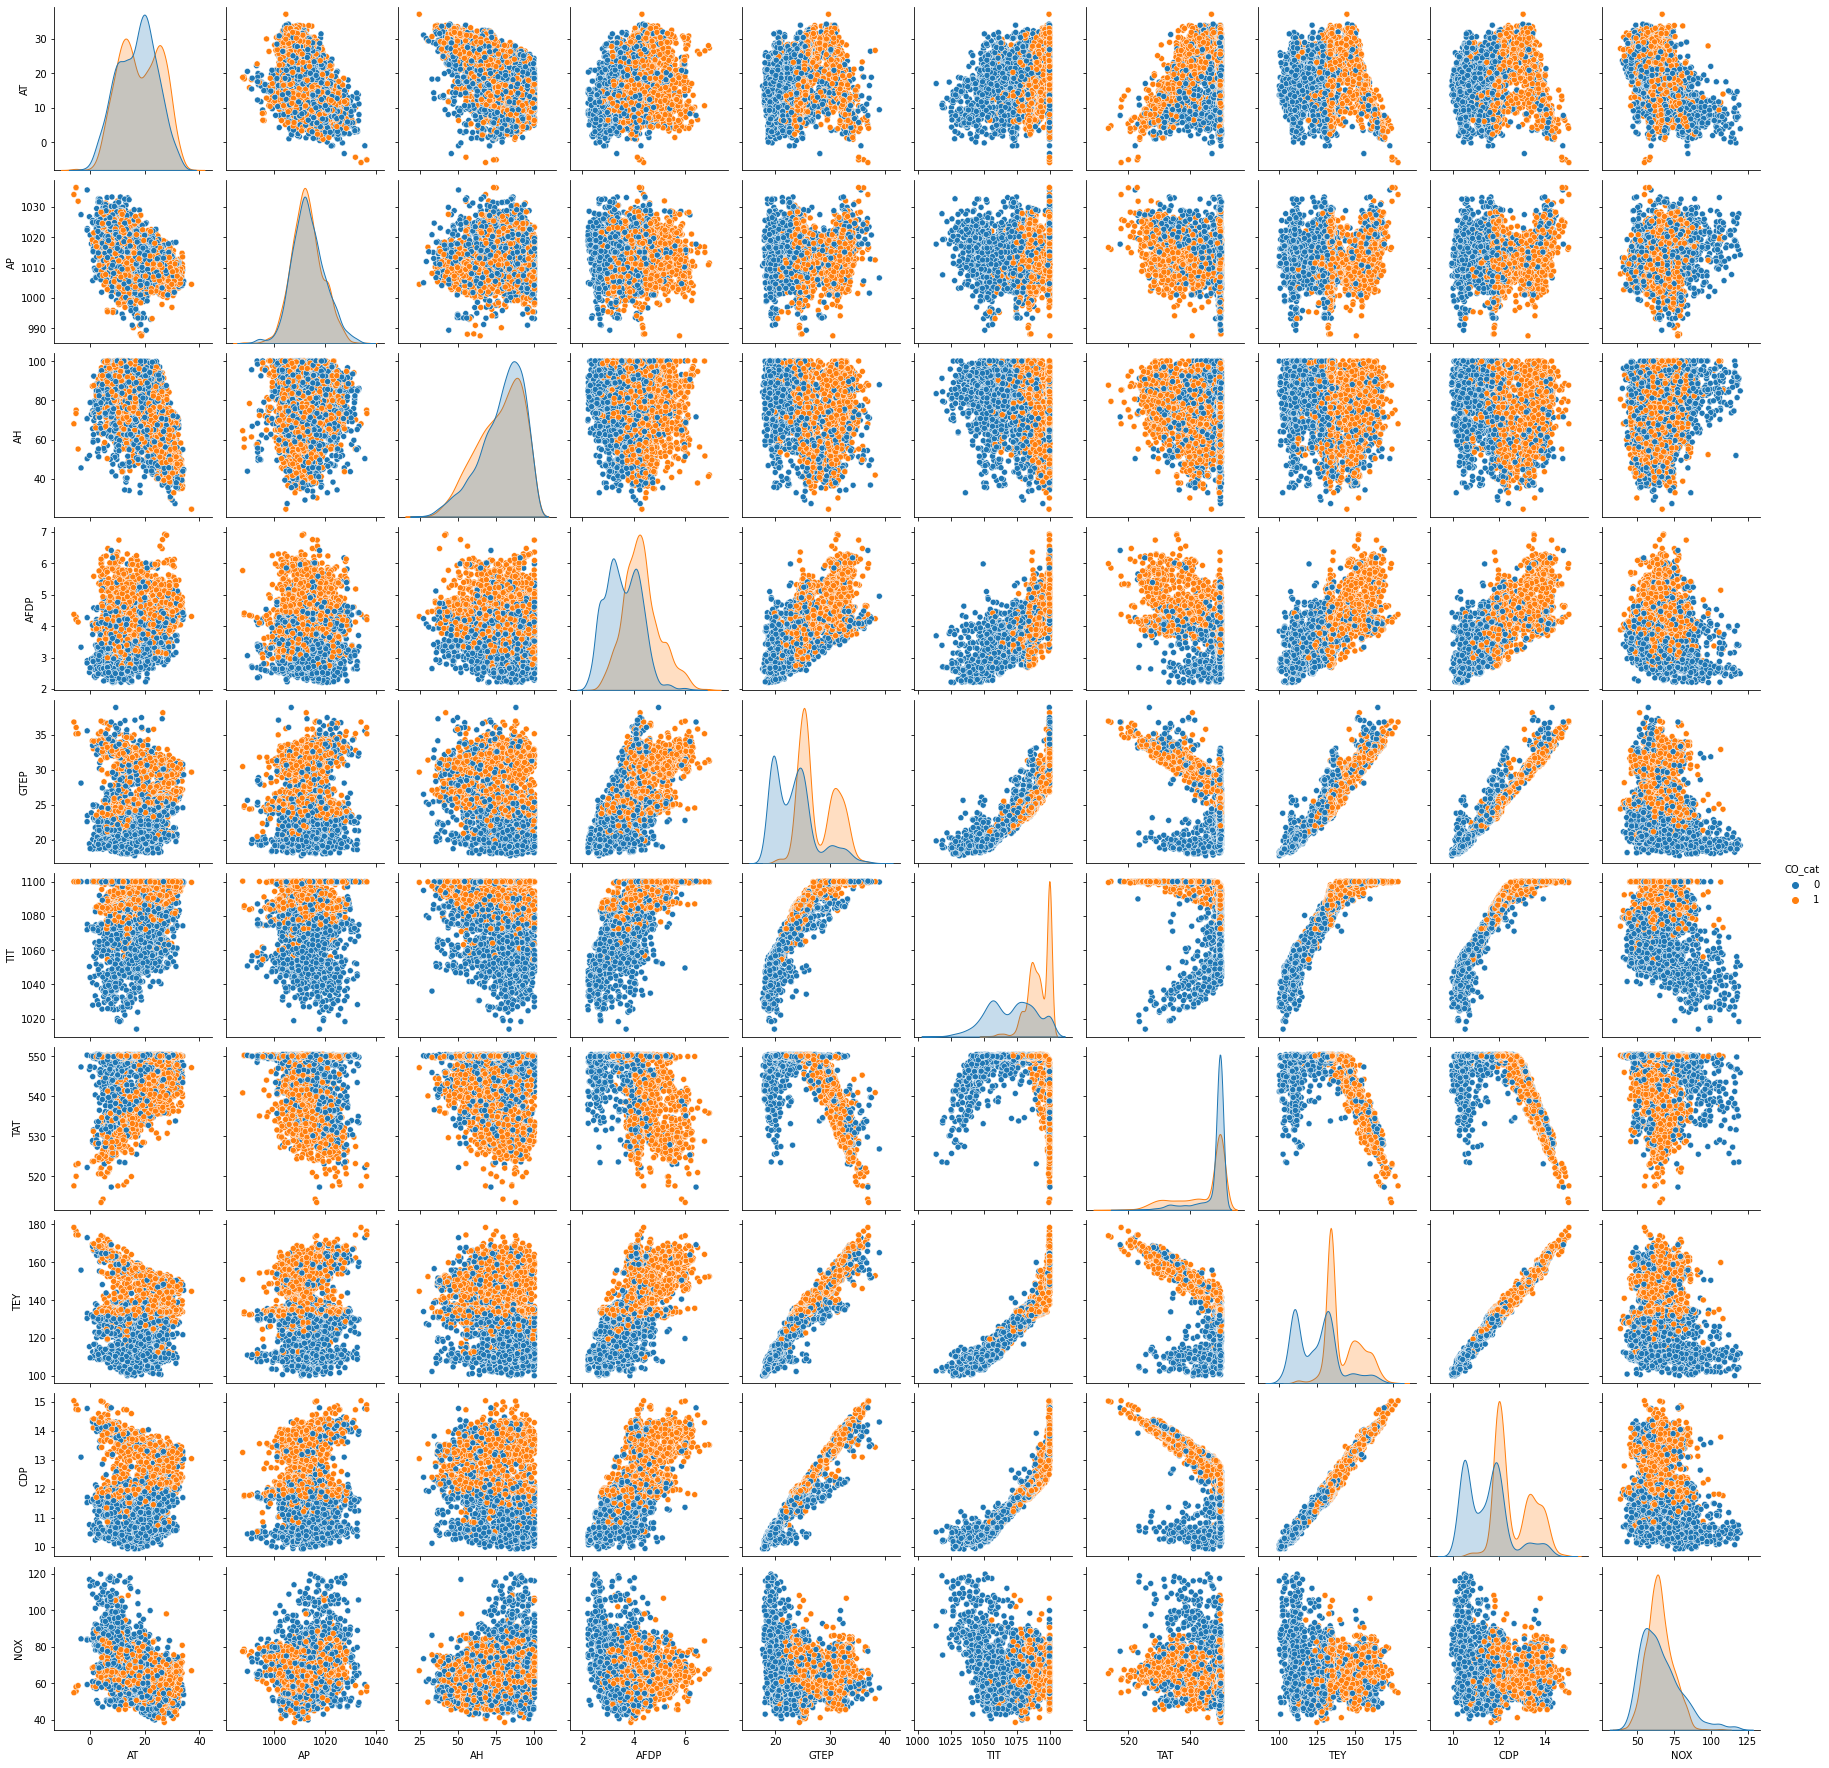

In [11]:
sns.pairplot(df_train[feats + ['CO_cat']].sample(5000), hue='CO_cat');

## 👀 Przegląd korelacji

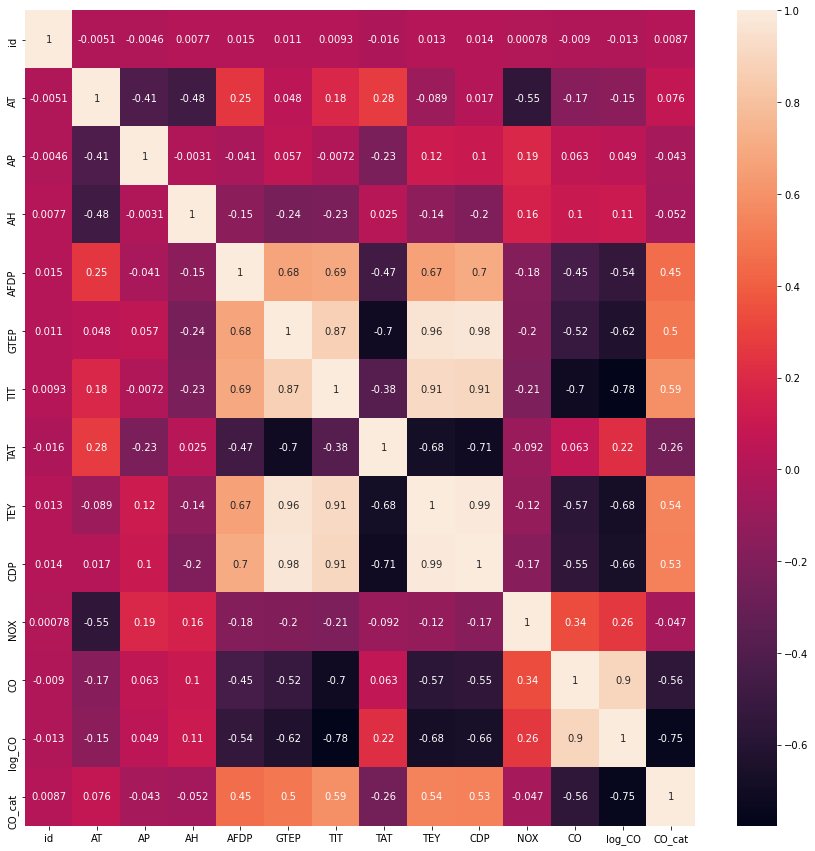

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True);